# EDA Hispasonic

el Análisis Exploratorio de Datos es, por una parte, una perspectiva o actitud sobre el análisis de datos, en la que se exhorta a que
el investigador adopte una actitud activa en y hacia el análisis de los mismos, como un medio para sugerir nuevas hipótesis de
trabajo.

 Cuanto más  se sepa de los datos, mejor se podrán utilizar para efectuar  pruebas inferenciales y desarrollar las teorías bajo estudio. En  resumen, el A.E.D. busca maximizar toda la información que  ofrezcan los datos.

Just wanted to give you a heads up about the exploratory data analysis (EDA) we're about to dive into. The goal here is simply to dig into the data, get to know it better, and see what interesting nuggets we can uncover. No ulterior motives, no sales pitches – just good old-fashioned data exploration!

We're excited to put our knowledge to work and see what insights we can glean from this awesome dataset. 

Rest assured, we're not planning to use the data for anything shady. It's all about learning and expanding our understanding.

If you've got any questions or concerns, feel free to shout them out. Otherwise, let's roll up our sleeves and dive in!

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
from bs4 import BeautifulSoup
import matplotlib as mpl
from matplotlib import pyplot as plt
import datetime as dt

In [2]:
pd.set_option('display.max_rows', None)

In [3]:
df = pd.read_csv("csv/hpw202425_.csv")

## 1. First contact


We make a visualization of the first 5 rows.

In [4]:
df.head(5)

,Unnamed: 0,urgent,buy,change,sell,price,gift,search,repair,parts,synt_brand,description,city,published,expire,date_scrapped,seen
0,1,0,0,0,1,120,0,0,0,0,korg,korg volca sample 2,Zaragoza,2024/02/05,2024/07/08,2024/2/5,52
1,2,0,0,0,1,200,0,0,0,0,korg,korg 05r w módulo,Madrid,2023/07/27,2024/07/07,2024/2/5,834
2,3,0,0,0,1,3190,0,0,0,0,clavia,clavia nord stage 4 73 keys,Baleares,2024/01/29,2024/07/05,2024/2/5,385
3,4,0,0,1,0,0,0,0,0,0,roland,roland rd 2000,Madrid,2023/11/19,2024/07/02,2024/2/5,738
4,5,0,0,0,1,425,0,0,0,0,korg,korg drumlogue,Bizkaia,2023/01/24,2024/07/08,2024/2/5,1970


## 2. Dataframe Visualization Transposed Random Samples

After loading, we randomly display and transpose the contents of the dataframe

In [5]:
df.sample(5).T

,43182,148120,107566,232,112207
Unnamed: 0,43183,148121,107567,233,112208
urgent,0,0,0,0,0
buy,0,0,0,0,0
change,0,0,0,0,0
sell,1,1,1,1,1
price,750,379,90,925,600
gift,0,0,0,0,0
search,0,0,0,0,0
repair,0,0,0,0,0
parts,0,0,0,0,0


## 3. Null Value Detection.

The next step would be to check whether or not we have null values.

In [6]:
df.isnull().sum()

Unnamed: 0       0
urgent           0
buy              0
change           0
sell             0
price            0
gift             0
search           0
repair           0
parts            0
synt_brand       0
description      0
city             0
published        0
expire           0
date_scrapped    0
seen             0
dtype: int64

It looks like we don't have any null values in any of the columns in the dataset.

## 4. Summary:

- The dataset has a header column, this may seem obvious but there are datasets that don't have one, so it doesn't hurt to indicate it.

- We don't have null `NaN` values (missing values)

## 5. Converting data to the right type

If we do a quick inspection we can see that we only have data of numerical type and object type, but that we need to have the appropriate data type formatted in relation to the dates.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148575 entries, 0 to 148574
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     148575 non-null  int64 
 1   urgent         148575 non-null  int64 
 2   buy            148575 non-null  int64 
 3   change         148575 non-null  int64 
 4   sell           148575 non-null  int64 
 5   price          148575 non-null  int64 
 6   gift           148575 non-null  int64 
 7   search         148575 non-null  int64 
 8   repair         148575 non-null  int64 
 9   parts          148575 non-null  int64 
 10  synt_brand     148575 non-null  object
 11  description    148575 non-null  object
 12  city           148575 non-null  object
 13  published      148575 non-null  object
 14  expire         148575 non-null  object
 15  date_scrapped  148575 non-null  object
 16  seen           148575 non-null  int64 
dtypes: int64(11), object(6)
memory usage: 19.3+ MB


Since we have to convert the date data to the correct format in order to work with it, we are going to check that all the data we have to convert does not give us any problems.

In [8]:
df[['published','expire','date_scrapped']].isnull().sum()

published        0
expire           0
date_scrapped    0
dtype: int64

Sure? 🤔

In [9]:
df['published'].value_counts(dropna=False)

published
2024/01/22    9675
2024/01/29    8300
2024/01/15    8000
2024/02/05    5700
2024/02/02    5575
2024/02/03    5375
2024/02/01    5050
2024/01/31    4550
2024/01/08    4300
2024/01/30    3875
2024/02/04    2400
              2325
2023/12/07    1975
2023/12/10    1750
2023/12/04    1725
2023/11/16    1700
2023/12/09    1500
2023/07/27    1375
2023/11/13    1325
2023/12/11    1250
2023/11/19    1200
2023/10/09    1175
2023/09/14    1125
2023/11/17    1100
2023/10/27    1050
2023/12/05    1050
2023/12/18    1025
2023/01/05    1000
2023/10/22     950
2023/11/20     925
2023/07/08     900
2023/09/25     875
2023/09/08     825
2023/09/30     825
2023/06/21     825
2023/12/08     800
2023/05/16     775
2023/05/26     775
2023/12/17     775
2023/12/23     725
2023/12/12     725
2023/11/29     675
2023/10/20     675
2023/11/30     650
2023/11/23     650
2023/11/22     650
2023/09/17     625
2023/10/19     600
2023/01/20     600
2023/01/04     600
2023/07/03     550
2023/03/31     550
20

Apparently **we have 2325 blanks spaces** 🫨. 

This means that we obviously don't have null values, but white space is not a type of data that helps us.

If we want to convert this series in time, **it won't be possible unless we eliminate it**.

In [10]:
df['expire'].value_counts(dropna=False)

expire
2024/07/08    6525
2024/07/05    5575
2024/07/09    5375
2024/07/06    5325
2024/07/13    4975
2024/07/10    4925
2024/07/07    4900
2024/07/16    4625
2024/07/25    4325
2024/07/14    4200
2024/07/03    4175
2024/07/04    4025
2024/07/17    3800
2024/07/12    3450
2024/07/20    3450
2024/07/15    3400
2024/07/01    3375
2024/07/02    3175
2024/07/26    3050
2024/07/27    3000
2024/06/30    2825
2024/07/11    2825
2024/07/18    2800
2024/07/21    2750
2024/07/23    2600
2024/07/24    2425
2024/07/19    2400
2024/07/28    2250
2024/06/24    2075
2024/06/27    2050
2024/06/26    1975
2024/06/25    1950
2024/07/22    1875
2024/06/29    1475
2024/07/30    1425
2024/06/28    1425
2024/06/23    1375
2024/06/22    1175
2024/06/20    1150
2024/02/07    1100
2024/06/18     975
2024/07/29     850
2024/02/21     775
2024/02/13     775
2024/03/15     725
2024/06/09     700
2024/06/19     675
2024/02/28     675
2024/06/21     625
2024/05/18     525
2024/02/01     525
2024/02/27     475
2024/

ok!

In [11]:
df['date_scrapped'].value_counts(dropna=False)

date_scrapped
2024/2/5    148575
Name: count, dtype: int64

ok, too.

### 6. Summary.

In the 'published' series there are 2325 blank spaces. 

<br>

The quickest strategy would be to remove those 2325 rows from the total dataset with a boolean filter.


$$\text{Porcentaje} = \left( \frac{\text{Specific value}}{\text{Total Value}} \right) \times 100 $$

<br>

In this case, if the total value is 148575 and the specific value is 2325, we can calculate the percentage as follows:

<br>

$$\text{Percentage of total dataset} = \left( \frac{2325}{148575} \right) \times 100 \approx 1.566 $$



<br>

We created the boolean filter that will help us redo our dataset

In [12]:
bool_published = df['published'] != " "
bool_published.value_counts()

published
True     146250
False      2325
Name: count, dtype: int64

If we want to keep the maximum number of values and remove the fewest rows, we apply the Boolean filter to the entire dataset.

In [13]:
ndf = df[bool_published]
ndf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146250 entries, 0 to 148574
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     146250 non-null  int64 
 1   urgent         146250 non-null  int64 
 2   buy            146250 non-null  int64 
 3   change         146250 non-null  int64 
 4   sell           146250 non-null  int64 
 5   price          146250 non-null  int64 
 6   gift           146250 non-null  int64 
 7   search         146250 non-null  int64 
 8   repair         146250 non-null  int64 
 9   parts          146250 non-null  int64 
 10  synt_brand     146250 non-null  object
 11  description    146250 non-null  object
 12  city           146250 non-null  object
 13  published      146250 non-null  object
 14  expire         146250 non-null  object
 15  date_scrapped  146250 non-null  object
 16  seen           146250 non-null  int64 
dtypes: int64(11), object(6)
memory usage: 20.1+ MB


In [14]:
ndf.isnull().sum()

Unnamed: 0       0
urgent           0
buy              0
change           0
sell             0
price            0
gift             0
search           0
repair           0
parts            0
synt_brand       0
description      0
city             0
published        0
expire           0
date_scrapped    0
seen             0
dtype: int64

Now all that's left is to convert the columns we're interested in to datetime.

## 7. Converting Object Data Type to Datetime Data Type

The "SettingWithCopyWarning" warning message suggests that you're trying to assign values to a view in a DataFrame instead of the original DataFrame. This can lead to unexpected or unwanted results. To avoid this warning, you can use the 'copy()' method to create an explicit copy of the DataFrame before performing any mapping operations.

This way, you're working with an explicit copy of the original DataFrame and avoid the "SettingWithCopyWarning" warning.

Their warning appears when pandas encounter something called string mapping: the combination of chaining and mapping, all in one step. It's important to note that this is simply a warning, not a mistake. The code will still run, but the results may not always match what you thought they would be

In [15]:
ndf_copy = ndf.copy() # Avoiding SettingWithCopyWarning!!!

In [16]:
ndf_copy['published_dt'] = pd.to_datetime(ndf_copy['published'])

In [17]:
ndf_copy['expire_dt'] = pd.to_datetime(ndf_copy['expire'])

In [18]:
ndf_copy['date_scrapped_dt'] = pd.to_datetime(ndf_copy['date_scrapped'])

In [19]:
ndf_copy.isnull().sum()

Unnamed: 0          0
urgent              0
buy                 0
change              0
sell                0
price               0
gift                0
search              0
repair              0
parts               0
synt_brand          0
description         0
city                0
published           0
expire              0
date_scrapped       0
seen                0
published_dt        0
expire_dt           0
date_scrapped_dt    0
dtype: int64

We need to remove the columns that we no longer use.

In [20]:
remove_columns = ['published','expire','date_scrapped']
ndf_copy = ndf_copy.drop(remove_columns, axis=1)

In [21]:
ndf_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146250 entries, 0 to 148574
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Unnamed: 0        146250 non-null  int64         
 1   urgent            146250 non-null  int64         
 2   buy               146250 non-null  int64         
 3   change            146250 non-null  int64         
 4   sell              146250 non-null  int64         
 5   price             146250 non-null  int64         
 6   gift              146250 non-null  int64         
 7   search            146250 non-null  int64         
 8   repair            146250 non-null  int64         
 9   parts             146250 non-null  int64         
 10  synt_brand        146250 non-null  object        
 11  description       146250 non-null  object        
 12  city              146250 non-null  object        
 13  seen              146250 non-null  int64         
 14  published

## 8. Ratio of categorical to continuous data.

The ratio of categorical to continuous data can influence the approach and techniques used in data analysis. Recognizing this difference will allow you to select the right tools and methods to explore, analyze, and draw meaningful conclusions from your dataset.

<br>

1. **Impact on the selection of analysis techniques**:

    - **Categorical Data**: If you have more categorical data, you may focus more on descriptive analysis techniques, such as frequency charts, bar charts, and trend analysis.

    - **Continuous Data**: If you have more continuous data, you'll likely lean toward more advanced statistical analysis techniques, such as regression, correlation analysis, and predictive modeling.

<br>

2. **Selecting Suitable Visualizations**:

    - **Categorical Data**: For categorical data, you can use bar charts, pie charts, and categorized scatter plots to visualize the distribution and relationships between the different categories.

    - **Continuous Data**: For continuous data, histograms, box plots, and kernel density plots are useful for visualizing the distribution and dispersion of the data.

<br>

3. **Data Pre-processing**:

    - **Categorical Data**: You may need to perform categorical variable coding (e.g., [one-hot encoding](https://www.educative.io/blog/one-hot-encoding)) before applying certain machine learning algorithms.


    - **Continuous Data**: You may need to normalize or standardize continuous data before applying certain algorithms to ensure that all features have equal weight.

<br>


4. **Interpretation of results**:

    - **Categorical Data**: When analyzing categorical data, it is important to interpret frequencies and ratios in the context of categories in order to draw meaningful conclusions.

    - **Continuous Data**: With continuous data, you can perform trend analysis, identify linear or nonlinear relationships, and make predictions based on statistical models.

In [22]:
ndf_copy.shape

(146250, 17)

In [23]:
ndf_copy.describe()

,Unnamed: 0,urgent,buy,change,sell,price,gift,search,repair,parts,seen,published_dt,expire_dt,date_scrapped_dt
count,146250.000000,146250.000000,146250.000000,146250.000000,146250.000000,146250.000000,146250.000000,146250.000000,146250.0,146250.000000,146250.000000,146250,146250,146250
mean,74286.161709,0.000328,0.010427,0.036068,0.956410,682.596923,0.000342,0.003419,0.0,0.002051,963.205128,2023-09-05 00:46:01.846153984,2024-06-24 18:15:37.846154240,2024-02-05 00:00:00
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,4.000000,2015-03-03 00:00:00,2024-01-17 00:00:00,2024-02-05 00:00:00
25%,37140.250000,0.000000,0.000000,0.000000,1.000000,139.000000,0.000000,0.000000,0.0,0.000000,277.000000,2023-09-13 00:00:00,2024-06-29 00:00:00,2024-02-05 00:00:00
50%,74286.500000,0.000000,0.000000,0.000000,1.000000,350.000000,0.000000,0.000000,0.0,0.000000,571.500000,2023-12-09 00:00:00,2024-07-08 00:00:00,2024-02-05 00:00:00
75%,111430.750000,0.000000,0.000000,0.000000,1.000000,750.000000,0.000000,0.000000,0.0,0.000000,1044.000000,2024-01-29 00:00:00,2024-07-16 00:00:00,2024-02-05 00:00:00
max,148575.000000,1.000000,1.000000,1.000000,1.000000,12000.000000,1.000000,1.000000,0.0,1.000000,22767.000000,2024-02-05 00:00:00,2024-07-31 00:00:00,2024-02-05 00:00:00
std,42890.082013,0.018114,0.101581,0.186461,0.204181,1090.622228,0.018487,0.058371,0.0,0.045245,1773.763217,NaN,NaN,NaN


In [24]:
data_points = 146250
actions = ['urgent', 'buy', 'change', 'sell', 'gift', 'search', 'repair','parts']
for action in actions:
    print(f"{action:}"+'\t',(ndf_copy[action].sum() * 100) / data_points)

urgent	 0.03282051282051282
buy	 1.0427350427350428
change	 3.606837606837607
sell	 95.64102564102564
gift	 0.03418803418803419
search	 0.3418803418803419
repair	 0.0
parts	 0.20512820512820512


To get descriptive statistics for non-numeric columns.

In [25]:
ndf_copy.describe(include=object)

,synt_brand,description,city
count,146250,146250,146250
unique,127,844,41
top,roland,modulos eurorack,Madrid
freq,19775,600,38775


### Summary

The first thing is that the relationship between categories and continuous data is very balanced, so it is a dataset that in principle promises a lot since we can make use of descriptive analysis techniques, and we can also explore more advanced statistical analysis techniques, such as regression, correlation analysis, and predictive modeling.

We also see that the number of data points 146250 quite large. In order to work with machine learning models, it can be interesting.

With the `describe` method we obtain statistics from the numerical columns:

We have a percentage of 95 percent of sales followed by almost 4 percent of change and 1 percent of purchase, if we take into account that we are talking about a total of 14650 data points we will understand that it is not little.

The average selling price of an instrument is around €682

The standard deviation 0,20 simply tells us how variable the prices are with respect to the mean value a standard deviation of 0.20 from the mean would not be considered very high. 

A relatively low standard deviation indicates that individual prices tend to be closer to the average price, suggesting that there is less variability in prices. 

A standard deviation of 0.20 indicates that most individual prices are within a relatively narrow range around the average price. 

In other words, prices tend to be fairly close to the average price, which means that **there is a consistency in prices**. 

In relation to the descriptive statistics we find that there are 127 different brands of manufacturers, from 41 different cities, that the brand that is repeated the most is Roland, the eurorack modules and the city with the highest number of sales is Madrid.

La diferencia entre el valor maximo y el 3er rango intercuartilico no  parece ser grande por lo que de entrada se descarta la existencia de outlyers aunque se comprobará a su debido tiempo.

In [26]:
#a = ndf_copy["synt_brand"]== "-"  #Esto es todo lo que no puede distinguir el asunto
#varios = ndf_copy[a]

In [27]:
## Distribución 

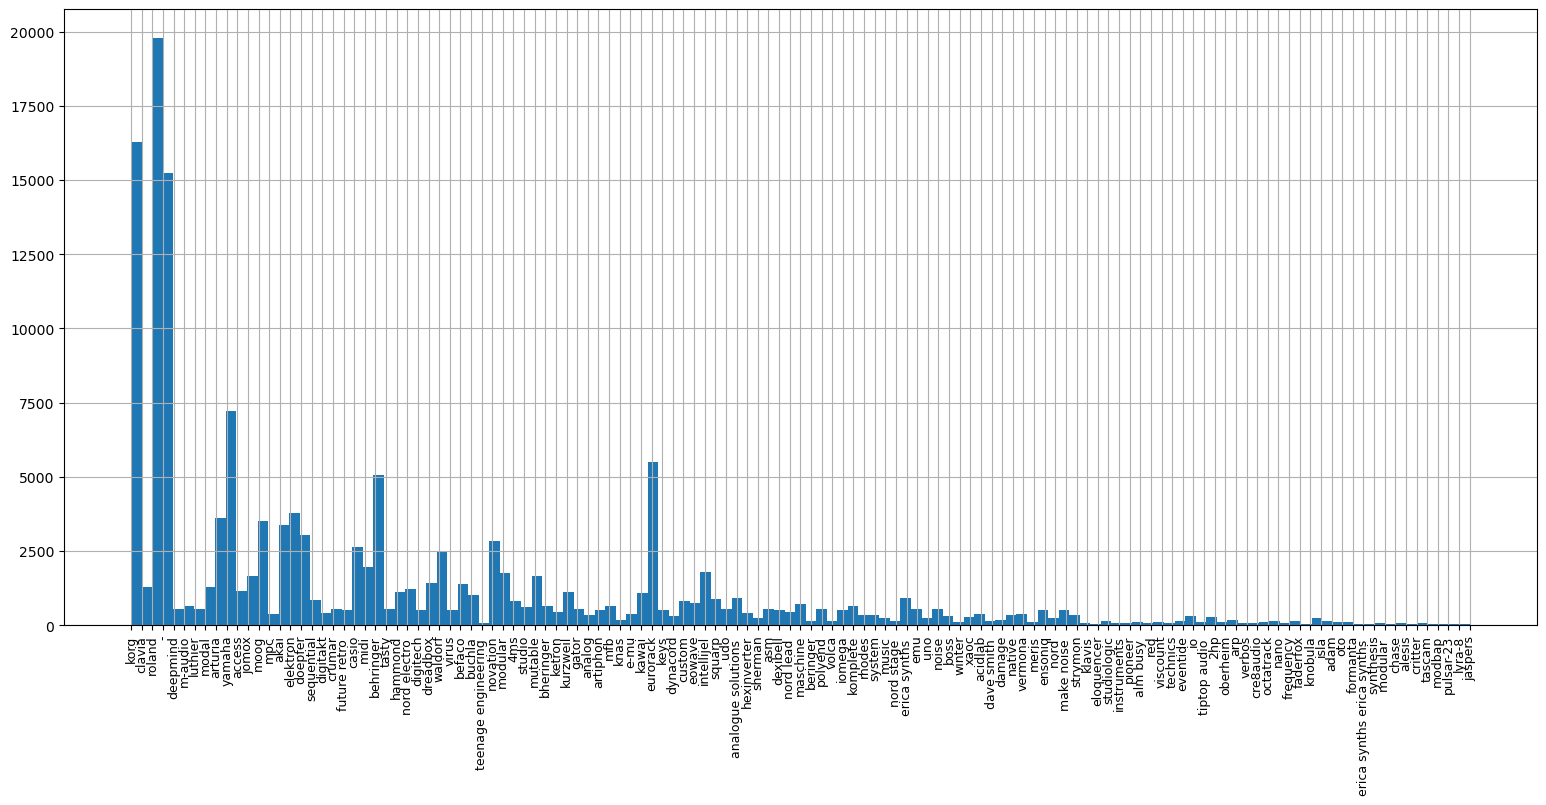

In [28]:
ndf_copy["synt_brand"].hist(figsize=(19,8),grid=True, xlabelsize=9,xrot=90, bins=127)
plt.show()

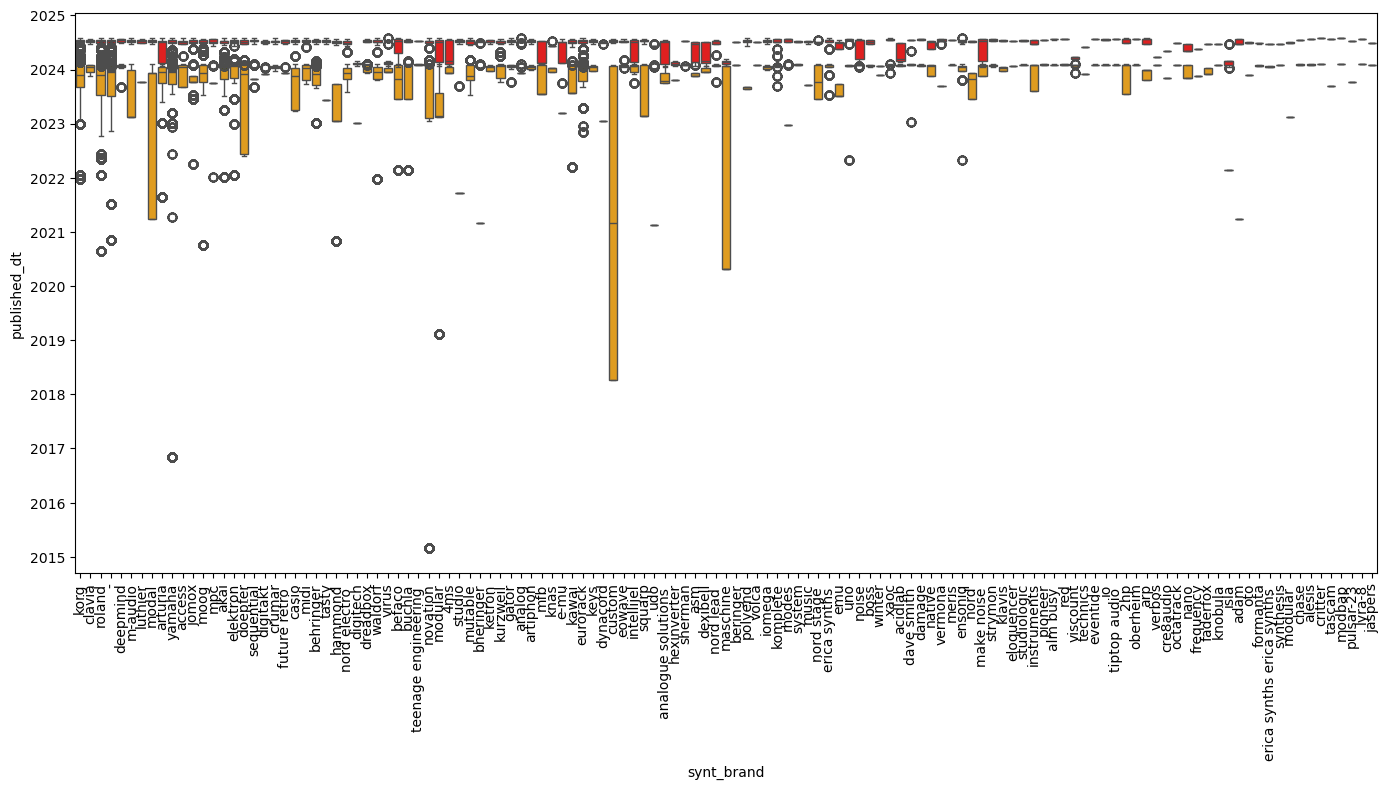

In [29]:
# Establecer el tamaño de la figura
plt.figure(figsize=(14, 8))  # Ajusta los valores de ancho y alto según sea necesario

sns.boxplot(data=ndf_copy, x="synt_brand", y="published_dt", orient="v", color = "orange")
sns.boxplot(data=ndf_copy, x="synt_brand", y="expire_dt", orient="v", color = "red")
                 
# Rotar las etiquetas del eje x
plt.xticks(rotation=90)

# Ajustar el diseño del gráfico
plt.tight_layout()

plt.show()

### 9. Data Visualization:

We will start the visualization of the data using the histogram, which will give us information about the number of times an element is repeated.

A histogram is a graphical representation of the frequency distribution of a data set. It shows how many times each value occurs within a dataset and provides information about the relative frequency of those values. 

Therefore, by using a histogram to visualize data, you can gain insight into the number of times an item is repeated (i.e., the frequency of each value) in the dataset. This allows you to understand the distribution of the data and identify important patterns or characteristics.